In [2]:
from google.colab import files
uploaded = files.upload()

Saving Tweets.csv to Tweets.csv


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
df = pd.read_csv(io.BytesIO(uploaded['Tweets.csv']))

In [26]:
# Load dataset
df = pd.read_csv('Tweets.csv')
df = df[['airline_sentiment', 'text', 'airline', 'tweet_created']]
df.columns = ['Sentiment', 'Tweet', 'Airline', 'Timestamp']


In [27]:
# Clean tweets
stop_words = set(stopwords.words('english'))
def clean_text(text):
    text = re.sub(r"http\S+|@\S+|#\S+|[^A-Za-z\s]", "", text)
    text = text.lower()
    words = text.split()
    return " ".join([w for w in words if w not in stop_words])

df['Clean_Tweet'] = df['Tweet'].apply(clean_text)

In [29]:
# Predict sentiment using TextBlob (for demo purpose)
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0: return 'Positive'
    elif polarity < 0: return 'Negative'
    else: return 'Neutral'
df['Predicted_Sentiment'] = df['Clean_Tweet'].apply(get_sentiment)

<ipython-input-30-0938a6ae6f97>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='coolwarm')
<ipython-input-30-0938a6ae6f97>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Predicted_Sentiment', data=df, palette='plasma')


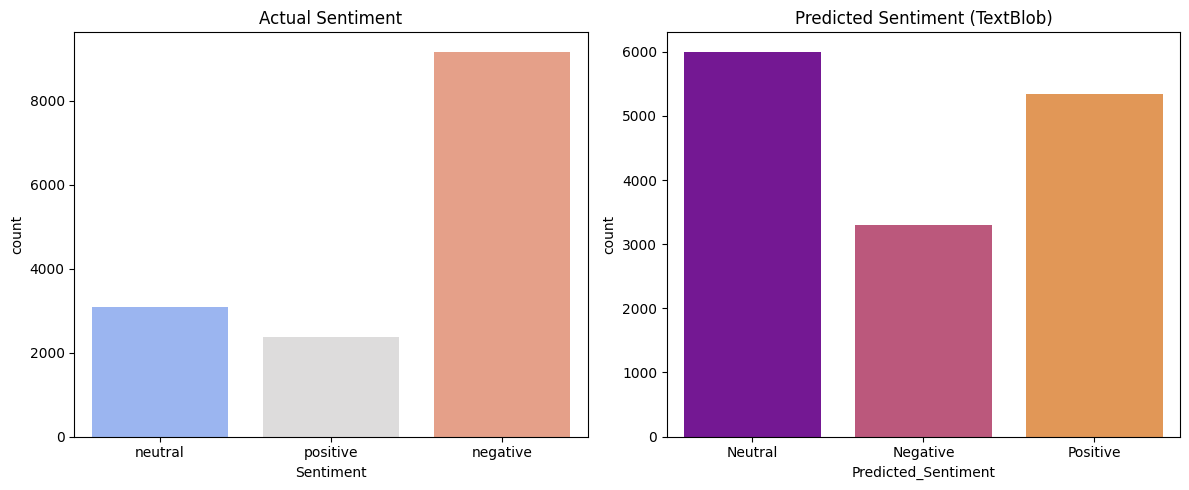

In [30]:
# --- VISUAL 1: Actual vs Predicted Sentiment Bar Chart
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Sentiment', data=df, palette='coolwarm')
plt.title('Actual Sentiment')

plt.subplot(1, 2, 2)
sns.countplot(x='Predicted_Sentiment', data=df, palette='plasma')
plt.title('Predicted Sentiment (TextBlob)')
plt.tight_layout()
plt.show()

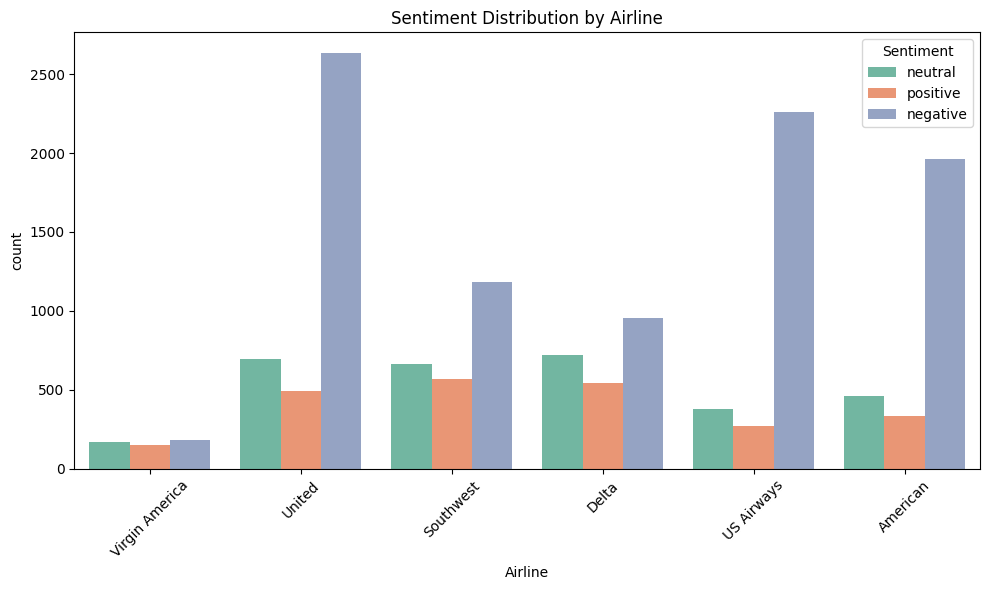

In [31]:
# --- VISUAL 2: Sentiment Distribution by Airline
plt.figure(figsize=(10, 6))
sns.countplot(x='Airline', hue='Sentiment', data=df, palette='Set2')
plt.title('Sentiment Distribution by Airline')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


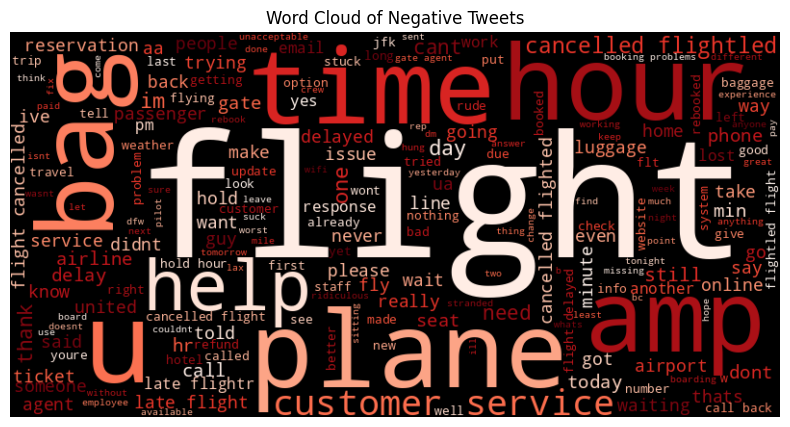

In [32]:
# --- VISUAL 3: Word Cloud for Negative Tweets
negative_text = " ".join(df[df['Sentiment'] == 'negative']['Clean_Tweet'])
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Negative Tweets")
plt.show()

<Figure size 1200x600 with 0 Axes>

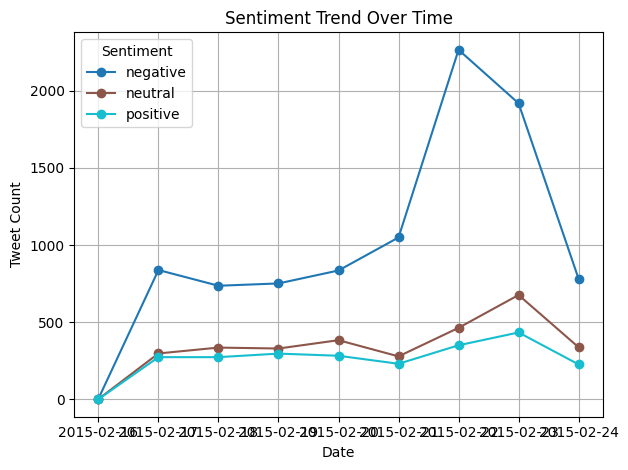

In [33]:
# --- VISUAL 4: Sentiment Trend Over Time (if timestamp useful)
df['Date'] = pd.to_datetime(df['Timestamp']).dt.date
sentiment_trend = df.groupby(['Date', 'Sentiment']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
sentiment_trend.plot(kind='line', marker='o', colormap='tab10')
plt.title('Sentiment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.grid(True)
plt.tight_layout()
plt.show()